In [1]:
#pandas libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# custom libraries
from cargar_df import get_train

df = get_train()

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16947 entries, 0 to 16946
Data columns (total 47 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   ID                                  16947 non-null  int16         
 1   Region                              16947 non-null  category      
 2   Territory                           16947 non-null  category      
 3   Pricing, Delivery_Terms_Quote_Appr  16947 non-null  int16         
 4   Pricing, Delivery_Terms_Approved    16947 non-null  int16         
 5   Bureaucratic_Code_0_Approval        16947 non-null  category      
 6   Bureaucratic_Code_0_Approved        16947 non-null  category      
 7   Bureaucratic_Code                   16947 non-null  category      
 8   Account_Created_Date                16947 non-null  datetime64[ns]
 9   Source                              16947 non-null  object        
 10  Billing_Country       

In [3]:
df["Stage"].value_counts()

Closed Won       9533
Closed Lost      7350
Proposal           35
Negotiation        18
Qualification      11
Name: Stage, dtype: int64

In [4]:
finished = df[(df["Stage"] == "Closed Won") | (df["Stage"] == "Closed Lost")]

In [5]:
finished["Won"] = finished["Stage"] == "Closed Won"

/home/gabriel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [6]:
finished["Won"]

0        False
1         True
2         True
3        False
4        False
         ...  
16942     True
16943     True
16944     True
16945    False
16946    False
Name: Won, Length: 16883, dtype: bool

In [7]:
del finished["Stage"]

In [8]:
finished.corr()

,ID,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Opportunity_ID,ASP,ASP_(converted),Delivery_Year,TRF,Total_Amount,Total_Taxable_Amount,Won
ID,1.000000,0.173203,0.048820,-0.110466,0.283175,0.040776,-0.326168,-0.037111,0.012258,0.032703,0.038966
"Pricing, Delivery_Terms_Quote_Appr",0.173203,1.000000,0.578051,-0.016172,0.126504,-0.002865,-0.042821,0.076864,0.036466,0.055933,-0.084992
"Pricing, Delivery_Terms_Approved",0.048820,0.578051,1.000000,0.035136,0.063813,-0.004638,0.067506,-0.041604,-0.020068,-0.002655,0.204484
Opportunity_ID,-0.110466,-0.016172,0.035136,1.000000,-0.094714,-0.033233,0.516984,0.003576,-0.003670,-0.002257,0.013347
ASP,0.283175,0.126504,0.063813,-0.094714,1.000000,0.090996,-0.174914,-0.070796,0.144060,0.108095,0.089578
ASP_(converted),0.040776,-0.002865,-0.004638,-0.033233,0.090996,1.000000,-0.081415,-0.000849,0.094064,0.486399,-0.015702
Delivery_Year,-0.326168,-0.042821,0.067506,0.516984,-0.174914,-0.081415,1.000000,0.047639,0.009188,0.015355,0.004799
TRF,-0.037111,0.076864,-0.041604,0.003576,-0.070796,-0.000849,0.047639,1.000000,0.410638,0.333258,-0.188661
Total_Amount,0.012258,0.036466,-0.020068,-0.003670,0.144060,0.094064,0.009188,0.410638,1.000000,0.716500,-0.083185
Total_Taxable_Amount,0.032703,0.055933,-0.002655,-0.002257,0.108095,0.486399,0.015355,0.333258,0.716500,1.000000,-0.080349


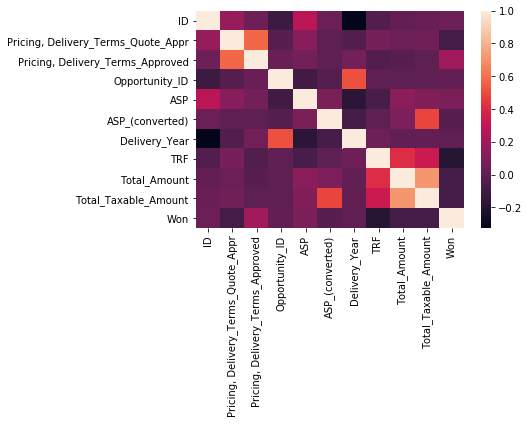

In [9]:
corr = finished.corr()
sns.heatmap(corr, 
               xticklabels=corr.columns.values,
               yticklabels=corr.columns.values)

In [10]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
for column in finished.select_dtypes("category"):
    finished[f"{column}_code"] = lb_make.fit_transform(finished[column])

/home/gabriel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [11]:
finished.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16883 entries, 0 to 16946
Data columns (total 70 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   ID                                  16883 non-null  int16         
 1   Region                              16883 non-null  category      
 2   Territory                           16883 non-null  category      
 3   Pricing, Delivery_Terms_Quote_Appr  16883 non-null  int16         
 4   Pricing, Delivery_Terms_Approved    16883 non-null  int16         
 5   Bureaucratic_Code_0_Approval        16883 non-null  category      
 6   Bureaucratic_Code_0_Approved        16883 non-null  category      
 7   Bureaucratic_Code                   16883 non-null  category      
 8   Account_Created_Date                16883 non-null  datetime64[ns]
 9   Source                              16883 non-null  object        
 10  Billing_Country       

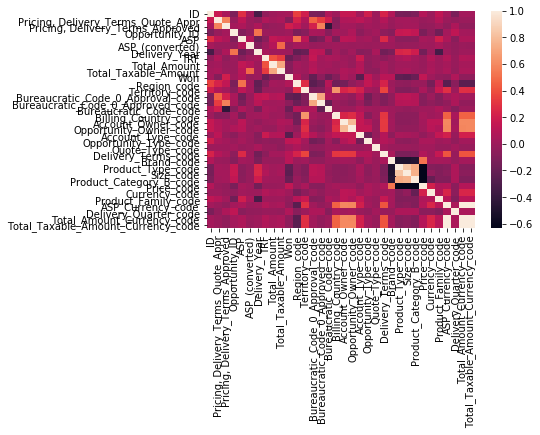

In [17]:
corr = finished.corr()
sns.heatmap(corr, 
               xticklabels=corr.columns.values,
               yticklabels=corr.columns.values)

In [ ]:
finished.corr()

In [13]:
won = finished["Won"]

In [14]:
won.__class__.__name__

'Series'

In [15]:
won.values


array([False,  True,  True, ...,  True, False, False])

In [16]:
won.axes

[Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                 9,
             ...
             16937, 16938, 16939, 16940, 16941, 16942, 16943, 16944, 16945,
             16946],
            dtype='int64', length=16883)]

In [ ]:
df = pd.DataFrame({"Won": won.values},
                  index=won.axes)

sns.heatmap(df, annot=True, fmt="g", cmap='viridis')

plt.show()


In [ ]:
most_correlation = won[lambda correlation: abs(correlation)>0.2]

In [ ]:
most_correlation


In [ ]:
df = pd.DataFrame({"Won": most_correlation.values},
                  index=most_correlation.axes)

heatmap = sns.heatmap(df, annot=True, fmt="g", cmap='viridis')
heatmap.set_title("Variables correlacionadas con el éxito/fracaso", fontsize=20)
heatmap.set_ylabel('Columnas más correlacionadas')
plt.show()
